# Instruction Types
<p> We have four templates to prompt the language model for sentiment analsis:
<ol>
  <li><b>No Template</b><br><br>
  This is where we just feed the input sentence without changing any input format.<br>
  Example: <br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>
  - <b>Input to the model:</b><br>
  'I hate watching this movie.'
  </li>
  <br>

  <li><b>Task Description</b><br><br>
  We include a task description as an instruction before the actual sentence.
  <br>
  Example for binary sentiment classification: <br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>
  - <b>Input to the model:</b><br>
  'Generate the sentiment of the next sentence from the labels positive, negative. I hate watching this movie.'
  </li><br>

  <li><b>Instruction Suffix</b><br><br>
  We include a template at the end of the sentence for the sentiment classification task.
  <br>
  Example for binary sentiment classification: <br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>
  - <b>Input to the model:</b><br>
  'I hate watching this movie. The sentiment of the previous sentence is'
  </li><br>

  <li><b>Questin-Answering Format</b><br><br>
  We know this knowledge that the underlying T5 models are also pre-trained on QA datasets with a specific QA format. We will transfer sentiment classification to a generative QA task.
  <br>
  Example for binary sentiment classification: <br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>
  - <b>Input to the model:</b><br>
  'question: what would be the sentiment of the sentence? context: I hate watching this movie.'
  </li><br>
</ol>
</p>

In [18]:
# define the internal cuda variables for gpu node in the vector's cluster.
!source ./src/reference_implementations/setup_gpu_worker.sh

Hostname: gpu041
Node Rank 0
Using Python from: /ssd003/home/snajafi/codes/PromptEngineering/prompt_torch-env/bin/python


# Experiment 1 on SemEval Sentiment

In the first Experiment, we are going to make predictions on the semeval 3-way sentiment classification task without any prompt templates added to the input.

In [21]:
!mkdir -p "/tmp/template_experiments"
!mkdir -p "/tmp/template_experiments/semeval"
!mkdir -p "/tmp/template_experiments/semeval/experiment1_no_template"

We run our prediction script with the required arguments for the no template experiment.

In [22]:
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/template_experiments/semeval/experiment1_no_template \
    --prediction_file /tmp/template_experiments/semeval/experiment1_no_template/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 17:02:48.457117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 17:02:48.457224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 17:02:48.457297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 17:02:48.457368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 17:02:48.457400: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Experiment 2 on SemEval Sentiment
In our second experiment, we are going to include the task description as an instruction to the beginning of the sentence.

In [39]:
!mkdir -p "/tmp/template_experiments/semeval/experiment2_task_description"
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/template_experiments/semeval/experiment2_task_description \
    --prediction_file /tmp/template_experiments/semeval/experiment2_task_description/semeval.predictions.csv \
    --instruction_type describe_task \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 17:18:12.291754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 17:18:12.291860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 17:18:12.291935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 17:18:12.292005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 17:18:12.292038: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Experiment 3 on SemEval Sentiment
In our third experiment, we are going to include the instruction at the end of the input sentence.

In [53]:
!mkdir -p "/tmp/template_experiments/semeval/experiment3_inst_at_end"
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/template_experiments/semeval/experiment3_inst_at_end \
    --prediction_file /tmp/template_experiments/semeval/experiment3_inst_at_end/semeval.predictions.csv \
    --instruction_type instruction_at_end \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 18:18:29.595650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:18:29.595762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:18:29.595834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:18:29.595904: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:18:29.595937: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

# Experiment 4 on SemEval Sentiment
In our last experiment on semeval, we are going to use the question-answering format for sentiment analysis.

In [41]:
!mkdir -p "/tmp/template_experiments/semeval/experiment4_qa"
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path /tmp/template_experiments/semeval/experiment4_qa \
    --prediction_file /tmp/template_experiments/semeval/experiment4_qa/semeval.predictions.csv \
    --instruction_type qa \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 17:26:37.601072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 17:26:37.601194: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 17:26:37.601274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 17:26:37.601346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 17:26:37.601380: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [43]:
!tensorboard --logdir=/tmp/template_experiments/semeval/ --bind_all

2023-02-13 17:30:03.789909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 17:30:03.789943: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 17:30:07.078015: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 17:30:07.121457: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 17:30:07.122874: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

In [42]:
# to view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
# use the following command with the port specified by the tensorboard command above (e.g. 6006)
# then type following URL in your local web browser: http://localhost:6006/
# ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006

# Results on SemEval
You should see the following results.
Using the Question-Answering format wins over other instruction templates.

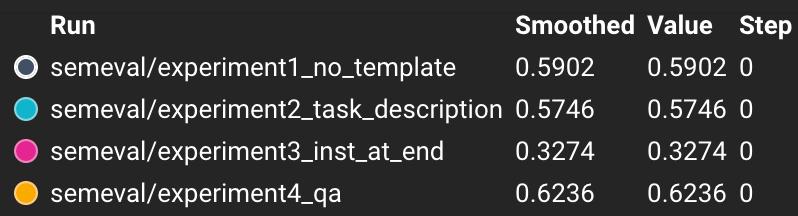

# Experiments on SST-2 Binary Sentiment Classification Task

Similar to SemEval, we can use our four types of templates to query a t5-large language model for binary sentiment classification
as evaluated on the sst-2 validation split.

In [47]:
!mkdir -p "/tmp/template_experiments/sst2/"
!mkdir -p "/tmp/template_experiments/sst2/experiment1_no_template"
!mkdir -p "/tmp/template_experiments/sst2/experiment2_task_description"
!mkdir -p "/tmp/template_experiments/sst2/experiment3_inst_at_end"
!mkdir -p "/tmp/template_experiments/sst2/experiment4_qa"

In [48]:
# exp1
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path /tmp/template_experiments/sst2/experiment1_no_template \
    --prediction_file /tmp/template_experiments/sst2/experiment1_no_template/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 18:03:01.723007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:03:01.723115: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:03:01.723186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:03:01.723254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:03:01.723286: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [49]:
# exp2
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path /tmp/template_experiments/sst2/experiment2_task_description \
    --prediction_file /tmp/template_experiments/sst2/experiment2_task_description/sst2.predictions.csv \
    --instruction_type describe_task \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 18:05:37.777912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:05:37.778025: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:05:37.778100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:05:37.778172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:05:37.778215: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [52]:
# exp3
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path /tmp/template_experiments/sst2/experiment3_inst_at_end \
    --prediction_file /tmp/template_experiments/sst2/experiment3_inst_at_end/sst2.predictions.csv \
    --instruction_type instruction_at_end \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 18:15:47.485753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:15:47.485864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:15:47.485939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:15:47.486012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:15:47.486047: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [51]:
# exp4
!python -m src.reference_implementations.prompt_zoo.trainer \
    --batch_size 1024 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 128 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path /tmp/template_experiments/sst2/experiment4_qa \
    --prediction_file /tmp/template_experiments/sst2/experiment4_qa/sst2.predictions.csv \
    --instruction_type qa \
    --t5_pretrained_model google/t5-large-lm-adapt

2023-02-13 18:11:05.688538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:11:05.688659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-02-13 18:11:05.688734: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:11:05.688805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-02-13 18:11:05.688841: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Canno

In [54]:
# re-launch the tensorboard to view the updated results with sst2
!tensorboard --logdir=/tmp/template_experiments/ --bind_all

2023-02-13 18:20:29.902446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 18:20:29.902483: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 18:20:31.463469: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 18:20:31.502754: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 18:20:31.504146: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

# Results from SST2

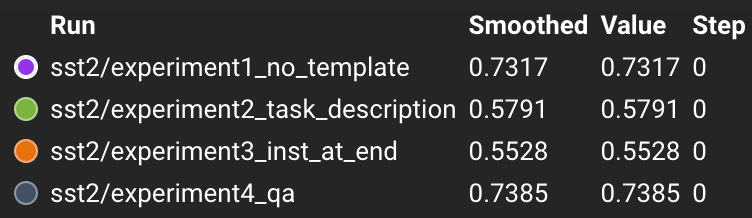